In [ ]:
import os

In [3]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.8 MB/s eta 0:00:00


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=40):
    """Searches for and returns images for a given term"""
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

urls = search_images('rotten fruit', max_images=1)
urls[0]

Searching for 'rotten fruit'


'http://2.bp.blogspot.com/_9FmuFIOX1ak/S-ni6HYymmI/AAAAAAAAANg/t7hVNTgHpug/s1600/IMG_6197.jpg'

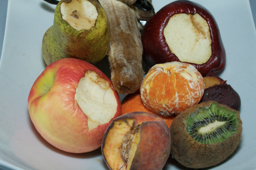

In [5]:
from fastdownload import download_url
dest = 'rotten.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'fresh fruit'


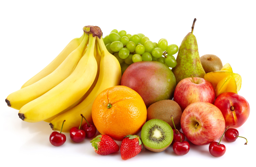

In [6]:
download_url(search_images('fresh fruit', max_images=1)[0], 'fresh.jpg', show_progress=False)
Image.open('fresh.jpg').to_thumb(256,256)

In [7]:
searches = 'rotten', 'fresh'
path=Path('rotten_or_fresh')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} fruit'))
    sleep(5)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} apple'))
    sleep(5)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} banana'))
    sleep(5)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} vegetables'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'rotten fruit'
Searching for 'rotten apple'
Searching for 'rotten banana'
Searching for 'rotten vegetables'
Searching for 'fresh fruit'
Searching for 'fresh apple'
Searching for 'fresh banana'
Searching for 'fresh vegetables'


In [8]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

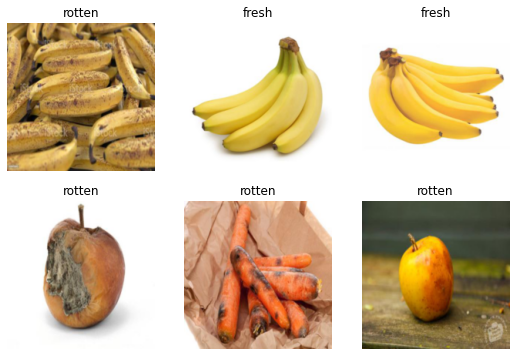

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
clf = vision_learner(dls, resnet18, metrics=error_rate)
clf.fine_tune(5)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.017145,0.418611,0.152542,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.300927,0.250313,0.067797,00:50
1,0.197866,0.258661,0.067797,00:50
2,0.131694,0.157241,0.050847,00:51
3,0.100171,0.138909,0.050847,00:49
4,0.092836,0.143275,0.050847,00:50


Testing the Classifier by Using the previously downloaded Images

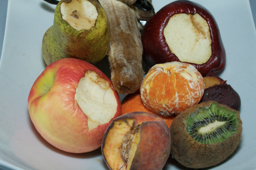

In [11]:
Image.open('rotten.jpg').to_thumb(256,256)

In [12]:
is_rotten,_,probs = clf.predict(PILImage.create('rotten.jpg'))
print(f"This fruit/vegetable is: {is_rotten}.")
print(f"Probability it's rotten: {probs[1]:.4f}")

This fruit/vegetable is: rotten.
Probability it's rotten: 1.0000


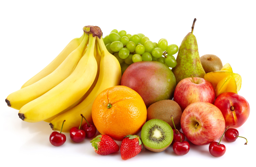

In [13]:
Image.open('fresh.jpg').to_thumb(256,256)

In [14]:
is_rotten,_,probs = clf.predict(PILImage.create('fresh.jpg'))
print(f"This fruit/vegetable is: {is_rotten}.")
print(f"Probability it's fresh: {probs[0]:.4f}")

This fruit/vegetable is: fresh.
Probability it's fresh: 0.9985


Classifying Specific fruits(like oranges for which images were not installed specifically)

Searching for 'fresh orange'


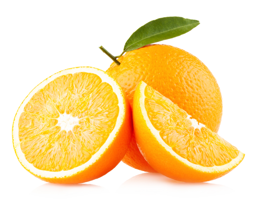

In [15]:
download_url(search_images('fresh orange', max_images=1)[0], 'fresh orange.jpg', show_progress=False)
Image.open('fresh orange.jpg').to_thumb(256,256)

In [16]:
is_rotten,_,probs = clf.predict(PILImage.create('fresh orange.jpg'))
print(f"This fruit/vegetable is: {is_rotten}.")
print(f"Probability it's fresh: {probs[0]:.4f}")

This fruit/vegetable is: fresh.
Probability it's fresh: 0.9967


Searching for 'rotten orange'


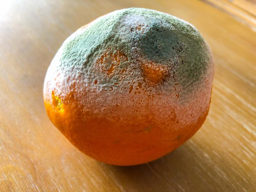

In [17]:
download_url(search_images('rotten orange', max_images=1)[0], 'rotten orange.jpg', show_progress=False)
Image.open('rotten orange.jpg').to_thumb(256,256)

In [18]:
is_rotten,_,probs = clf.predict(PILImage.create('rotten orange.jpg'))
print(f"This fruit/vegetable is: {is_rotten}.")
print(f"Probability it's rotten: {probs[1]:.4f}")

This fruit/vegetable is: rotten.
Probability it's rotten: 0.9999
